In [3]:
import matplotlib.pyplot as plt
from PIL import Image
import tensorflow as tf
import os
from monodepth_model import *
from monodepth_dataloader import *
from average_gradients import *

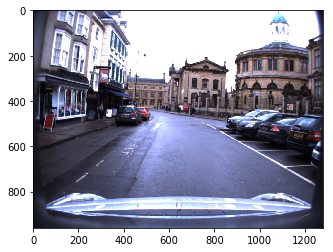

In [4]:
os.chdir('Robotcar/robotcar-dataset-sdk/python/')
from image import load_image
os.chdir('../../..')

image_path = 'Robotcar/sample_small/stereo/centre/1418381798264157.png'
img = load_image(image_path)
plt.imshow(img)

In [5]:
img = Image.fromarray(img)
img.save("Robotcar/robotcar-dataset-sdk/test_images/test.png")

In [7]:
# Run only if you want qualitative data

# !python2 monodepth_simple.py --image_path Robotcar/robotcar-dataset-sdk/test_images/test.png --checkpoint_path model_kitti/model_kitti.ckpt

2018-02-09 10:44:48.691496: I tensorflow/core/platform/cpu_feature_guard.cc:137] Your CPU supports instructions that this TensorFlow binary was not compiled to use: SSE4.2 AVX AVX2 FMA
done!


In [13]:
# Paste Nicolas's code here and save ground truth in arrays/dictionaries

# Forward pass: Input = test image, Output = disparities

In [6]:
!python2 monodepth_simple.py --image_path Robotcar/robotcar-dataset-sdk/test_images/test.png --checkpoint_path model_kitti/model_kitti.ckpt

2018-02-09 12:09:16.445696: I tensorflow/core/platform/cpu_feature_guard.cc:137] Your CPU supports instructions that this TensorFlow binary was not compiled to use: SSE4.2 AVX AVX2 FMA
done!


# Evaluation code: Input = disparities, Output = errors

We have a function that converts the disparity values to their corresponding depth values. Note: Change focal length according to the dataset.

In [8]:
# CHANGE THIS ACCORDING TO THE DATASET

width_to_focal = dict()                                                                                                                                                              
width_to_focal[1242] = 721.5377
width_to_focal[1241] = 718.856
width_to_focal[1224] = 707.0493
width_to_focal[1238] = 718.3351

In [11]:
pred_disparities = np.load('Robotcar/robotcar-dataset-sdk/test_images/test_disp.npy')

In [9]:
def convert_disps_to_depths(pred_disparities):
    pred_depths = width_to_focal[width] * 0.54 / pred_disparities
    return pred_depths

In [10]:
def compute_errors(gt_depths, pred_depths):
    gt = []
    pred = []
    for t in gt_depths:
        gt.append(t[2])
        pred.append(pred_depths[t[0]][t[1]])
    thresh = np.maximum((gt / pred), (pred / gt))
    a1 = (thresh < 1.25   ).mean()
    a2 = (thresh < 1.25 ** 2).mean()
    a3 = (thresh < 1.25 ** 3).mean()

    rmse = (gt - pred) ** 2
    rmse = np.sqrt(rmse.mean())

    rmse_log = (np.log(gt) - np.log(pred)) ** 2
    rmse_log = np.sqrt(rmse_log.mean())

    abs_rel = np.mean(np.abs(gt - pred) / gt)

    sq_rel = np.mean(((gt - pred)**2) / gt)

    return abs_rel, sq_rel, rmse, rmse_log, a1, a2, a3
